# Khám Phá Dữ Liệu - Amazon Beauty Ratings

**Sinh viên:** Phạm Phú Hòa  
**MSSV:** 23122030

**Mục đích:** Phân tích đặc điểm dữ liệu ratings (phân phối, sparsity, user/product patterns) để xác định chiến lược xây dựng hệ thống khuyến nghị.

## 1. Thiết Lập & Load Dữ Liệu

In [14]:
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from data_processing import DataProcessor

np.random.seed(42)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['figure.dpi'] = 100

In [15]:
# Load dữ liệu bằng NumPy
dp = DataProcessor().load_and_extract('../data/raw/ratings_Beauty.csv')

user_ids = dp.user_ids
product_ids = dp.product_ids
ratings = dp.ratings
timestamps = dp.timestamps

print(f"Tổng số records: {len(ratings):,}")
print(f"Unique users: {len(np.unique(user_ids)):,}")
print(f"Unique products: {len(np.unique(product_ids)):,}")

Tổng số records: 2,023,070
Unique users: 1,210,271
Unique users: 1,210,271
Unique products: 249,274
Unique products: 249,274


## 2. Phân Tích Phân Phối Ratings

In [16]:
# Thống kê ratings
print(f"Trung bình rating: {np.mean(ratings):.3f}")
print(f"Độ lệch chuẩn: {np.std(ratings):.3f}")
print(f"Median rating: {np.median(ratings):.1f}")

# Phân phối ratings
unique_ratings, counts = np.unique(ratings, return_counts=True)
for rating, count in zip(unique_ratings, counts):
    percentage = (count / len(ratings)) * 100
    print(f"{rating:.0f} sao: {count:,} ({percentage:.1f}%)")

Trung bình rating: 4.149
Độ lệch chuẩn: 1.312
Median rating: 5.0
1 sao: 183,784 (9.1%)
2 sao: 113,034 (5.6%)
3 sao: 169,791 (8.4%)
4 sao: 307,740 (15.2%)
5 sao: 1,248,721 (61.7%)


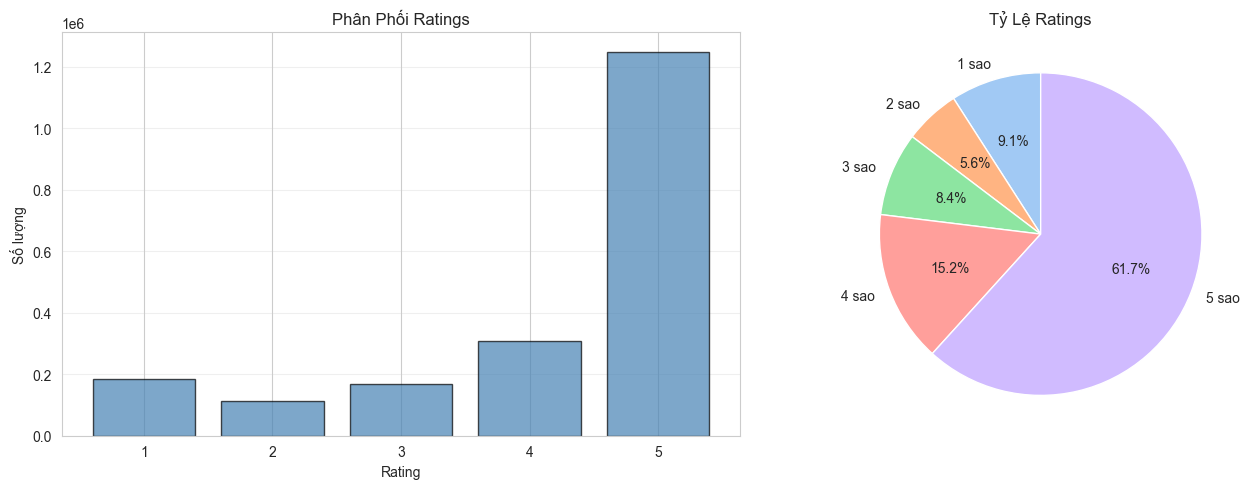

In [17]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
ax1.bar(unique_ratings, counts, color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Số lượng')
ax1.set_title('Phân Phối Ratings')
ax1.set_xticks([1, 2, 3, 4, 5])
ax1.grid(axis='y', alpha=0.3)

# Pie chart
ax2.pie(counts, labels=[f"{r:.0f} sao" for r in unique_ratings], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax2.set_title('Tỷ Lệ Ratings')

plt.tight_layout()
plt.show()

**Nhận xét:** Ratings thiên về 5 sao (>60%), cho thấy bias tích cực phổ biến trong e-commerce.

## 3. Phân Tích Hoạt Động Users

In [18]:
# Thống kê user activity
unique_users, user_counts = np.unique(user_ids, return_counts=True)

print(f"Tổng users: {len(unique_users):,}")
print(f"Trung bình ratings/user: {np.mean(user_counts):.2f}")
print(f"Median ratings/user: {np.median(user_counts):.0f}")
print(f"Max ratings của 1 user: {np.max(user_counts):,}")

# Percentiles
for p in [25, 50, 75, 90, 95, 99]:
    val = np.percentile(user_counts, p)
    print(f"Percentile {p}%: {val:.0f} ratings")

# Phân loại users
power_users = np.sum(user_counts >= 10)
casual_users = np.sum(user_counts < 5)
print(f"\nPower users (>=10 ratings): {power_users:,} ({power_users/len(unique_users)*100:.1f}%)")
print(f"Casual users (<5 ratings): {casual_users:,} ({casual_users/len(unique_users)*100:.1f}%)")

Tổng users: 1,210,271
Trung bình ratings/user: 1.67
Median ratings/user: 1
Max ratings của 1 user: 389
Percentile 25%: 1 ratings
Percentile 50%: 1 ratings
Percentile 75%: 2 ratings
Percentile 90%: 3 ratings
Percentile 95%: 4 ratings
Percentile 99%: 10 ratings

Power users (>=10 ratings): 12,595 (1.0%)
Casual users (<5 ratings): 1,157,897 (95.7%)


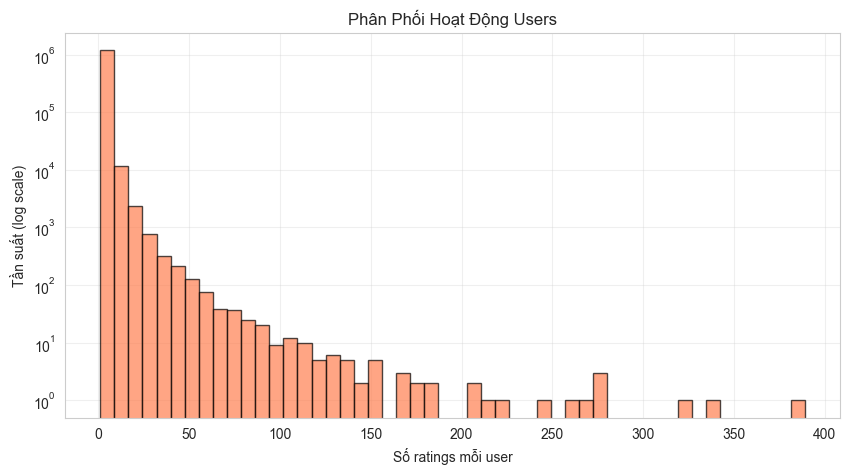

In [19]:
# Visualization
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(user_counts, bins=50, color='coral', alpha=0.7, edgecolor='black')
ax.set_xlabel('Số ratings mỗi user')
ax.set_ylabel('Tần suất (log scale)')
ax.set_title('Phân Phối Hoạt Động Users')
ax.set_yscale('log')
ax.grid(alpha=0.3)
plt.show()

**Nhận xét:** Phần lớn users có ít ratings, power users rất hiếm nhưng quan trọng cho hệ khuyến nghị.

## 4. Phân Tích Độ Phổ Biến Products

In [20]:
# Thống kê product popularity
unique_products, product_counts = np.unique(product_ids, return_counts=True)

print(f"Tổng products: {len(unique_products):,}")
print(f"Trung bình ratings/product: {np.mean(product_counts):.2f}")
print(f"Median ratings/product: {np.median(product_counts):.0f}")
print(f"Max ratings cho 1 product: {np.max(product_counts):,}")
print(f"Products chỉ có 1 rating: {np.sum(product_counts == 1):,}")

# Top 10 products
sorted_idx = np.argsort(product_counts)[::-1]
print(f"\nTop 10 products được rate nhiều nhất:")
for i in range(10):
    print(f"{i+1}. {unique_products[sorted_idx[i]]}: {product_counts[sorted_idx[i]]:,} ratings")

Tổng products: 249,274
Trung bình ratings/product: 8.12
Median ratings/product: 2
Max ratings cho 1 product: 7,533
Products chỉ có 1 rating: 103,484

Top 10 products được rate nhiều nhất:
1. B001MA0QY2: 7,533 ratings
2. B0009V1YR8: 2,869 ratings
3. B0043OYFKU: 2,477 ratings
4. B0000YUXI0: 2,143 ratings
5. B003V265QW: 2,088 ratings
6. B000ZMBSPE: 2,041 ratings
7. B003BQ6QXK: 1,918 ratings
8. B004OHQR1Q: 1,885 ratings
9. B00121UVU0: 1,838 ratings
10. B000FS05VG: 1,589 ratings


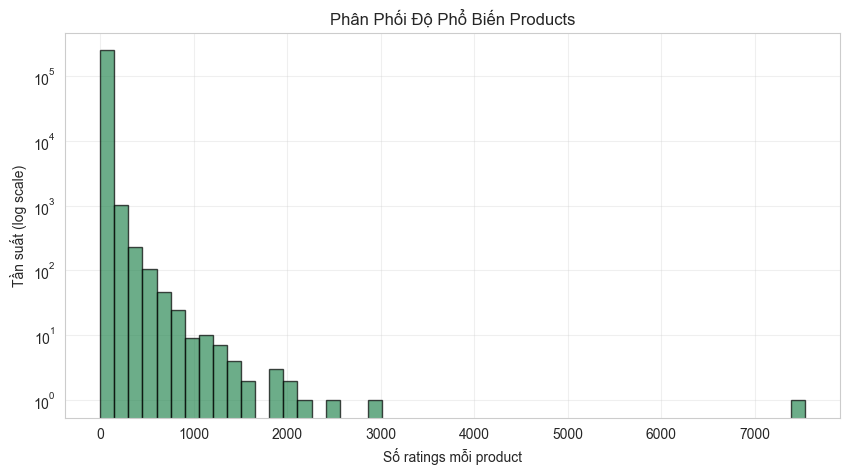

In [21]:
# Visualization
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(product_counts, bins=50, color='seagreen', alpha=0.7, edgecolor='black')
ax.set_xlabel('Số ratings mỗi product')
ax.set_ylabel('Tần suất (log scale)')
ax.set_title('Phân Phối Độ Phổ Biến Products')
ax.set_yscale('log')
ax.grid(alpha=0.3)
plt.show()

**Nhận xét:** Phân phối long-tail - nhiều products có ít ratings (cold start problem).

## 5. Phân Tích Xu Hướng Thời Gian

In [22]:
# Thống kê temporal
min_ts = np.min(timestamps)
max_ts = np.max(timestamps)

min_date = datetime.fromtimestamp(min_ts).strftime('%Y-%m-%d')
max_date = datetime.fromtimestamp(max_ts).strftime('%Y-%m-%d')
duration_years = (max_ts - min_ts) / (365.25 * 24 * 3600)

print(f"Khoảng thời gian: {min_date} đến {max_date}")
print(f"Thời lượng: {duration_years:.1f} năm")

Khoảng thời gian: 1998-10-19 đến 2014-07-23
Thời lượng: 15.8 năm


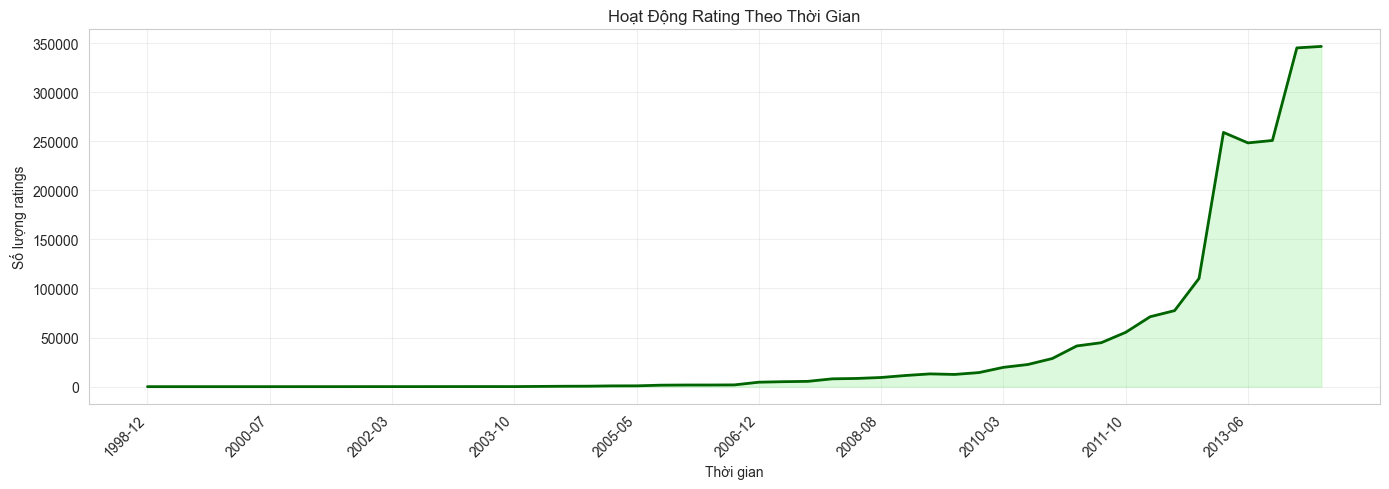

In [23]:
# Visualization
timestamps_sorted = np.sort(timestamps)
bins = np.linspace(min_ts, max_ts, 50)
counts, _ = np.histogram(timestamps, bins=bins)
bin_centers = (bins[:-1] + bins[1:]) / 2

dates = [datetime.fromtimestamp(ts).strftime('%Y-%m') for ts in bin_centers[::5]]

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(bin_centers, counts, linewidth=2, color='darkgreen')
ax.fill_between(bin_centers, counts, alpha=0.3, color='lightgreen')
ax.set_xlabel('Thời gian')
ax.set_ylabel('Số lượng ratings')
ax.set_title('Hoạt Động Rating Theo Thời Gian')
ax.set_xticks(bin_centers[::5])
ax.set_xticklabels(dates, rotation=45, ha='right')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Nhận xét:** Hoạt động rating tương đối ổn định theo thời gian.

## 6. Phân Tích Sparsity

In [24]:
n_users = len(unique_users)
n_products = len(unique_products)
n_ratings = len(ratings)

total_possible = n_users * n_products
sparsity = 1 - (n_ratings / total_possible)
density = 1 - sparsity

print(f"Users: {n_users:,}")
print(f"Products: {n_products:,}")
print(f"Tổng khả thi: {total_possible:,}")
print(f"Thực tế: {n_ratings:,}")
print(f"Sparsity: {sparsity:.6f} ({sparsity*100:.4f}%)")
print(f"Density: {density:.6f} ({density*100:.6f}%)")

Users: 1,210,271
Products: 249,274
Tổng khả thi: 301,689,093,254
Thực tế: 2,023,070
Sparsity: 0.999993 (99.9993%)
Density: 0.000007 (0.000671%)


**Nhận xét:** Sparsity cực cao (>99.9%) - cần:
- Matrix factorization (SVD, ALS)
- Filtering users/products theo min ratings
- Chiến lược xử lý cold-start

## 7. Lưu Kết Quả

In [26]:
# Lưu outputs cho notebook tiếp theo
np.savez_compressed('../data/processed/exploration_outputs.npz',
                    n_users=n_users,
                    n_products=n_products,
                    n_ratings=n_ratings,
                    sparsity=sparsity)

print("Đã lưu kết quả vào: data/processed/exploration_outputs.npz")

Đã lưu kết quả vào: data/processed/exploration_outputs.npz
